In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

## Linear Regression (Single-Variate)

#### Dataset
[Pizza Franchise Dataset](https://raw.githubusercontent.com/ss-is-master-chief/DSoAI-materials/master/Meetup_1/datasets/Pizza.Franchise.csv?token=AY2l8zBi0IgcG8KLM5MpnTwYYZdIQvIZks5cHdxLwA%3D%3D)
#### Features
* X = annual franchise fee ($1000)

* Y = start up cost ($1000)

In [0]:
pizza_df = pd.read_csv("https://raw.githubusercontent.com/ss-is-master-chief/DSoAI-materials/master/Meetup_1/datasets/Pizza.Franchise.csv?token=AY2l8wYWGAZ4dSI280mz3zvxbNHk0jCsks5cHdwNwA%3D%3D")
pizza_df.head()

,X,Y
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


Text(0,0.5,'start up cost ($1000)')

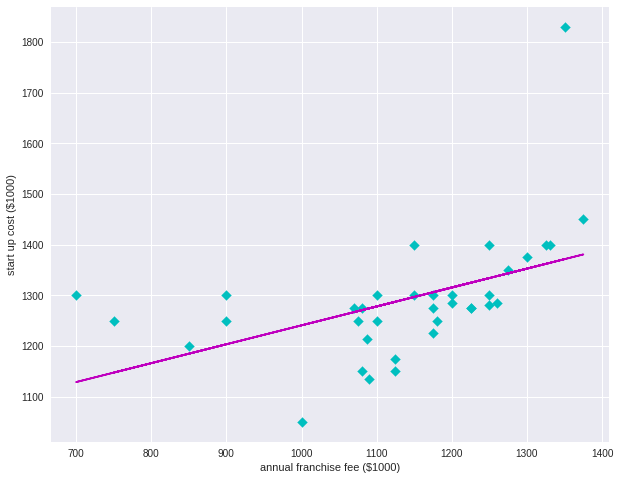

In [0]:
from sklearn.linear_model import LinearRegression

x = np.array(pizza_df['X'])
x = x.reshape([len(x), 1])
y = np.array(pizza_df['Y'])
y = y.reshape([len(y), 1])

linear_r = LinearRegression()
linear_r.fit(x, y)

prediction = linear_r.predict(x)

plt.figure(figsize=(10,8))
plt.scatter(x, y, color = "c", marker = "D")
plt.plot(x, prediction, color = "m")
plt.xlabel("annual franchise fee ($1000)")
plt.ylabel("start up cost ($1000)")

## Non-Linear Regression using MLP Regressor

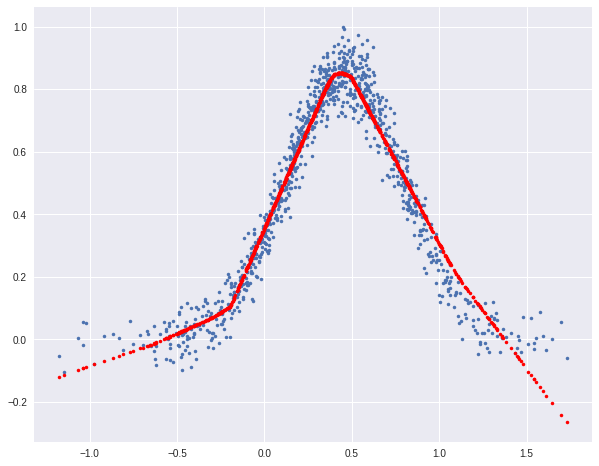

In [143]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

def make_data():
    N = 2000
    X = 0.5*np.random.normal(size=N)+0.35

    Xt = 0.75*X-0.35
    X = X.reshape((N,1))

    Y = -(8 * Xt**2 + 0.1*Xt + 0.1) + 0.05 * np.random.normal(size=N)
    Y = np.exp(Y) + 0.05 * np.random.normal(size=N)
    Y /= max(np.abs(Y))
    return X, Y

np.random.seed(0)
x, y = make_data()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.5, random_state=0)

mlp = MLPRegressor(random_state = 0)
mlp.fit(x, y)

Yguess = mlp.predict(Xtest)

plt.figure(figsize=(10,8))
plt.plot(Xtest[:,0], Ytest, '.')
plt.plot(Xtest[:,0], Yguess, 'r.')

plt.show()

## Logistic Regression

#### Dataset
[Iris Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

#### Features
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class: 
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica

In [0]:
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                      names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'class'])
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
classes = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

iris_df = iris_df.replace({'class': classes})
iris_df.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


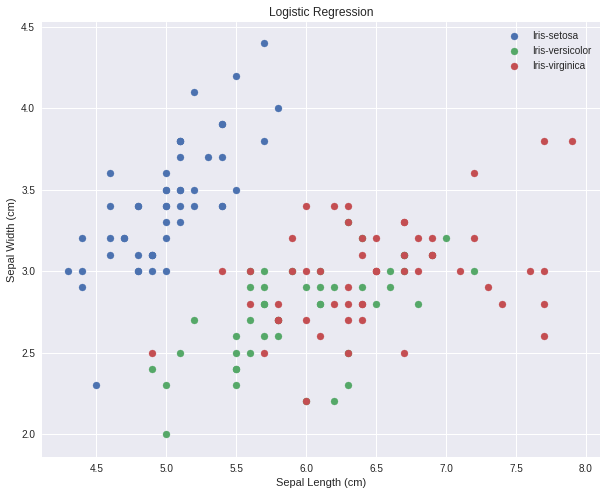

In [0]:
from sklearn.linear_model import LogisticRegression

X = iris_df.iloc[:, :4]
Y = iris_df.iloc[:, 4]
X = np.array(X)
Y = np.array(Y)

logistic_r = LogisticRegression()
logistic_r.fit(X, Y)

iris_class_pred = logistic_r.predict(X)

class_1 = np.where(iris_class_pred == 0)
class_2 = np.where(iris_class_pred == 1)
class_3 = np.where(iris_class_pred == 2)

plt.figure(figsize=(10,8))
plt.title("Logistic Regression")
plt.scatter(X[class_1, 0], X[class_1, 1])
plt.scatter(X[class_2, 0], X[class_2, 1])
plt.scatter(X[class_3, 0], X[class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## K Nearest Neigbours

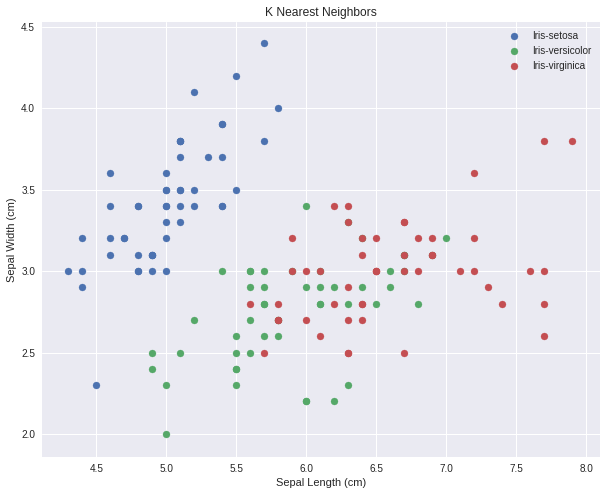

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)

knn_prediction = knn.predict(X)

knn_class_1 = np.where(knn_prediction == 0)
knn_class_2 = np.where(knn_prediction == 1)
knn_class_3 = np.where(knn_prediction == 2)

plt.figure(figsize=(10,8))
plt.title("K Nearest Neighbors")
plt.scatter(X[knn_class_1, 0], X[knn_class_1, 1])
plt.scatter(X[knn_class_2, 0], X[knn_class_2, 1])
plt.scatter(X[knn_class_3, 0], X[knn_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## Decision Trees

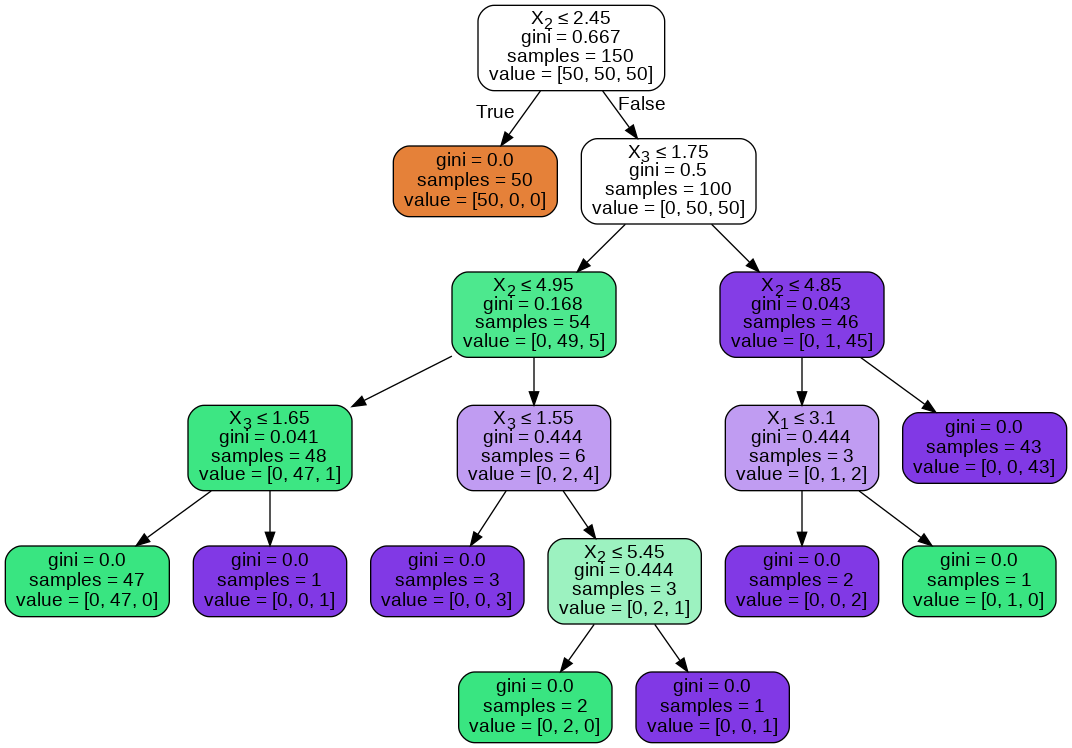

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

tree = DecisionTreeClassifier()
tree.fit(X, Y)

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=900, height=550)

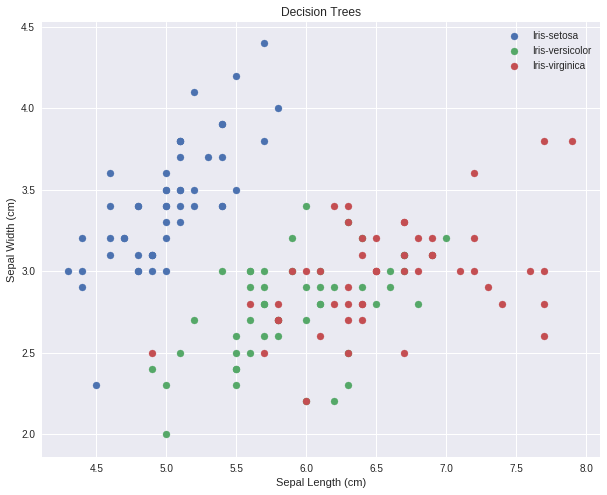

In [0]:
tree_prediction = tree.predict(X)

tree_class_1 = np.where(tree_prediction == 0)
tree_class_2 = np.where(tree_prediction == 1)
tree_class_3 = np.where(tree_prediction == 2)

plt.figure(figsize=(10,8))
plt.title("Decision Trees")
plt.scatter(X[tree_class_1, 0], X[tree_class_1, 1])
plt.scatter(X[tree_class_2, 0], X[tree_class_2, 1])
plt.scatter(X[tree_class_3, 0], X[tree_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## Random Forests

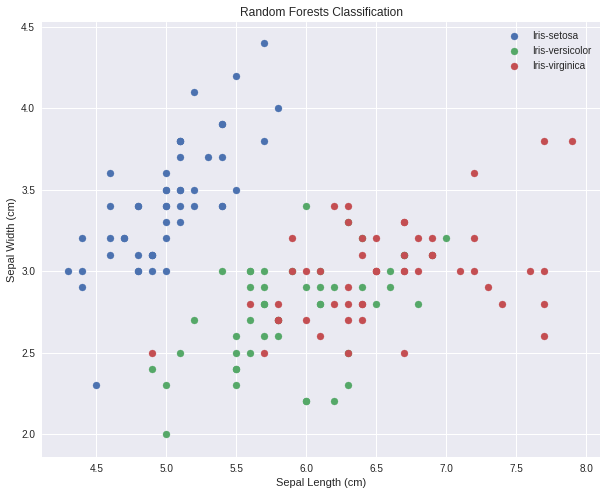

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators = 100, max_depth = 3)
random_f.fit(X, Y)

rf_prediction = random_f.predict(X)

rf_class_1 = np.where(rf_prediction == 0)
rf_class_2 = np.where(rf_prediction == 1)
rf_class_3 = np.where(rf_prediction == 2)

plt.figure(figsize=(10,8))
plt.title("Random Forests Classification")
plt.scatter(X[rf_class_1, 0], X[rf_class_1, 1])
plt.scatter(X[rf_class_2, 0], X[rf_class_2, 1])
plt.scatter(X[rf_class_3, 0], X[rf_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## Support Vector Machines (SVMs)

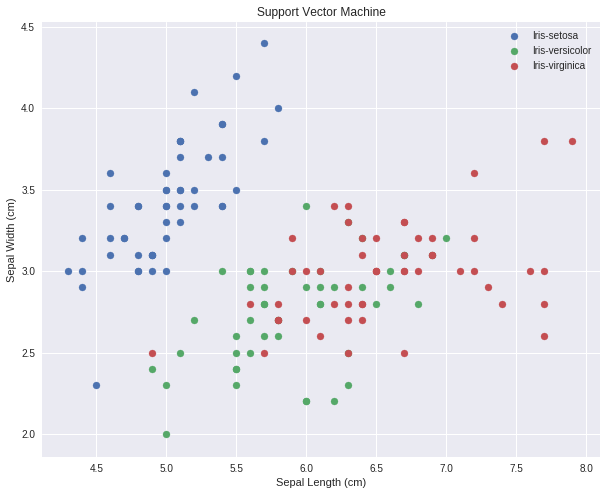

In [0]:
from sklearn import svm

supvec = svm.SVC(gamma='scale')
supvec.fit(X, Y)

svm_predict = supvec.predict(X)

svm_class_1 = np.where(rf_prediction == 0)
svm_class_2 = np.where(rf_prediction == 1)
svm_class_3 = np.where(rf_prediction == 2)

plt.figure(figsize=(10,8))
plt.title("Support Vector Machine")
plt.scatter(X[svm_class_1, 0], X[svm_class_1, 1])
plt.scatter(X[svm_class_2, 0], X[svm_class_2, 1])
plt.scatter(X[svm_class_3, 0], X[svm_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

## Comparing

1.   Logistic Regression
2.   K Nearest Neighbors
3.   Decision Trees
4.   Random Forests
5.   Support Vector Machines



Accuracy Scores:
> Logistic Regression: 96.00%
> KNN:                 96.00%
> Decision Tree:       100.00%
> Random Forests:      97.33%
> SVM:                 98.67%


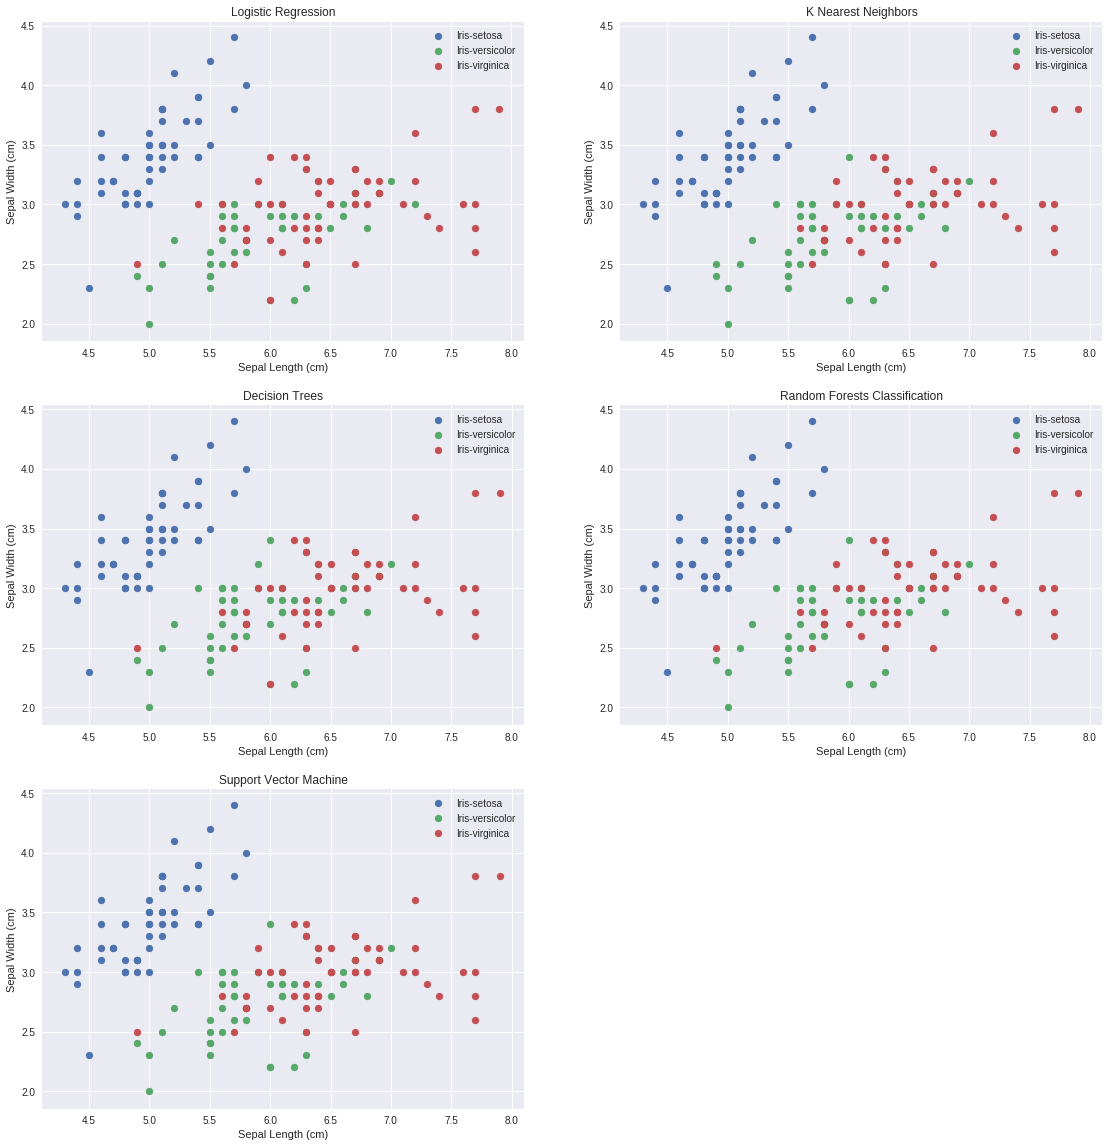

In [0]:
print("Accuracy Scores:")
print("> Logistic Regression: {0:.2f}%".format(logistic_r.score(X, Y)*100))
print("> KNN:                 {0:.2f}%".format(knn.score(X, Y)*100))
print("> Decision Tree:       {0:.2f}%".format(tree.score(X, Y)*100))
print("> Random Forests:      {0:.2f}%".format(random_f.score(X, Y)*100))
print("> SVM:                 {0:.2f}%".format(supvec.score(X, Y)*100))

plt.figure(figsize=(19,20))

plt.subplot(3,2,1)

plt.title("Logistic Regression")
plt.scatter(X[class_1, 0], X[class_1, 1])
plt.scatter(X[class_2, 0], X[class_2, 1])
plt.scatter(X[class_3, 0], X[class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.subplot(3,2,2)

plt.title("K Nearest Neighbors")
plt.scatter(X[knn_class_1, 0], X[knn_class_1, 1])
plt.scatter(X[knn_class_2, 0], X[knn_class_2, 1])
plt.scatter(X[knn_class_3, 0], X[knn_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.subplot(3,2,3)

plt.title("Decision Trees")
plt.scatter(X[tree_class_1, 0], X[tree_class_1, 1])
plt.scatter(X[tree_class_2, 0], X[tree_class_2, 1])
plt.scatter(X[tree_class_3, 0], X[tree_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.subplot(3,2,4)

plt.title("Random Forests Classification")
plt.scatter(X[rf_class_1, 0], X[rf_class_1, 1])
plt.scatter(X[rf_class_2, 0], X[rf_class_2, 1])
plt.scatter(X[rf_class_3, 0], X[rf_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.subplot(3,2,5)

plt.title("Support Vector Machine")
plt.scatter(X[svm_class_1, 0], X[svm_class_1, 1])
plt.scatter(X[svm_class_2, 0], X[svm_class_2, 1])
plt.scatter(X[svm_class_3, 0], X[svm_class_3, 1])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

plt.show()